# **Data Visualization**


## Objectives


*   Visualizing the distribution of data.

*   Visualizing the relationship between two features.

*   Visualizing composition of data.

*   Visualizing comparison of data.


<hr>


Connecting to the database.


In [13]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

Importing pandas module.


In [14]:
import pandas as pd

Listing all the tables


In [15]:

QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""

pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Visualizing distribution of data


### Histograms


Plotting a histogram of `ConvertedComp.`


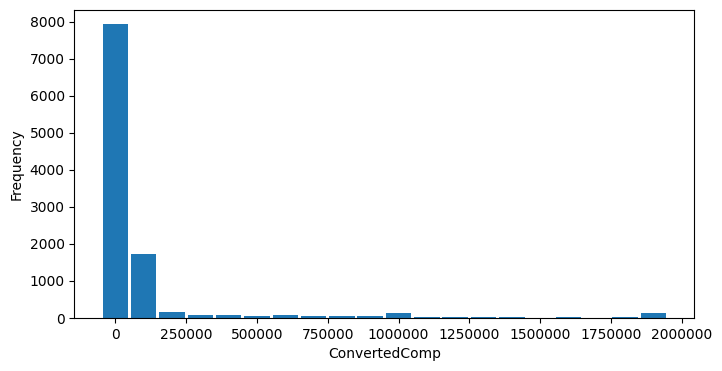

In [16]:

QUERY = """
SELECT *
FROM master
"""
data = pd.read_sql_query(QUERY,conn)

ax = data['ConvertedComp'].plot(kind='hist', figsize=(8,4), bins=20, rwidth=0.9, align='left')
ax.set_xlabel('ConvertedComp')
ax.ticklabel_format(style='plain')

### Box Plots


Plotting a box plot of `Age.`


<AxesSubplot:>

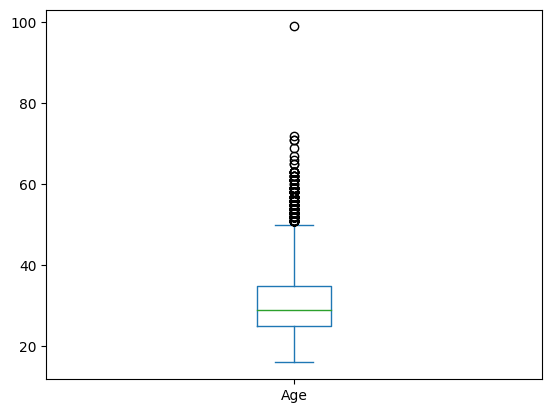

In [17]:

data['Age'].plot(kind='box')

## Visualizing relationships in data


### Scatter Plots


Creating a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='Age'>

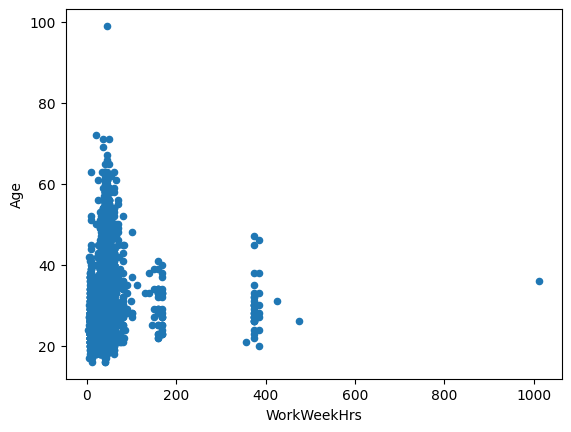

In [18]:

data.plot(kind='scatter', y='Age', x='WorkWeekHrs')

### Bubble Plots


Creating a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, using `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

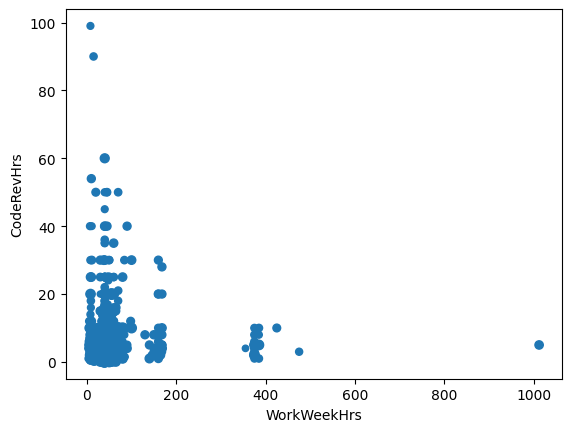

In [19]:

data.plot(kind='scatter', s='Age', y='CodeRevHrs', x='WorkWeekHrs')


## Visualizing composition of data


### Pie Charts


Creating a pie chart of the top 5 databases that respondents wish to learn next year.


Text(0.5, 1.0, 'DatabaseDesireNextYear')

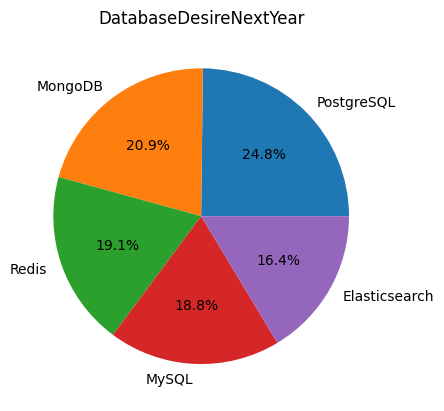

In [20]:

QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
data_db = pd.read_sql_query(QUERY,conn)

ax = data_db['DatabaseDesireNextYear'].value_counts().head(5).plot(kind='pie', ylabel='', autopct='%1.1f%%')
ax.set_title('DatabaseDesireNextYear')


### Stacked Charts


Creating a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

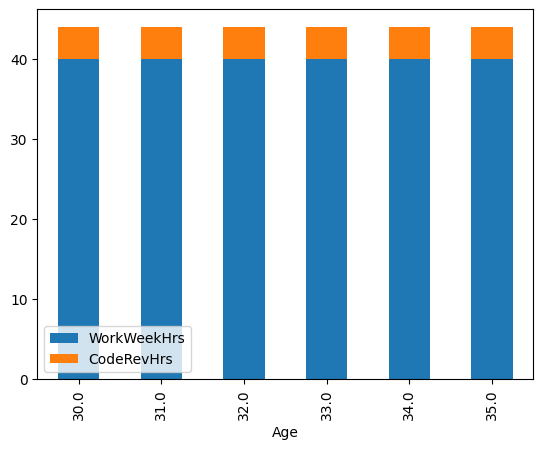

In [21]:

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age between 30 and 35
"""
data_sc = pd.read_sql_query(QUERY,conn)

data_sc.groupby('Age').median().plot(kind='bar', stacked=True)


## Visualizing comparison of data


### Line Chart


Plotting the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

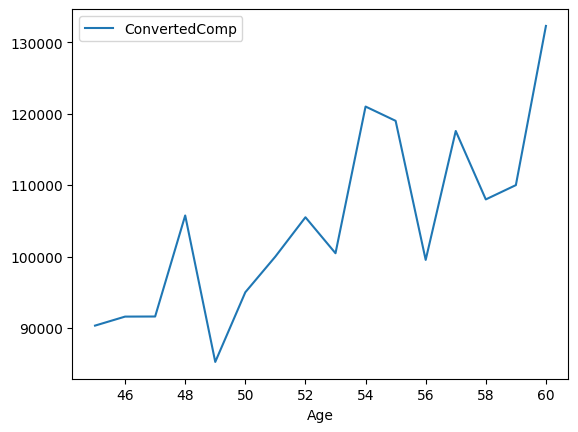

In [22]:

QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age between 45 and 60
"""
data_lc = pd.read_sql_query(QUERY,conn)

data_lc.groupby('Age').median().plot(kind='line')

### Bar Chart


Creating a horizontal bar chart using column `MainBranch.`


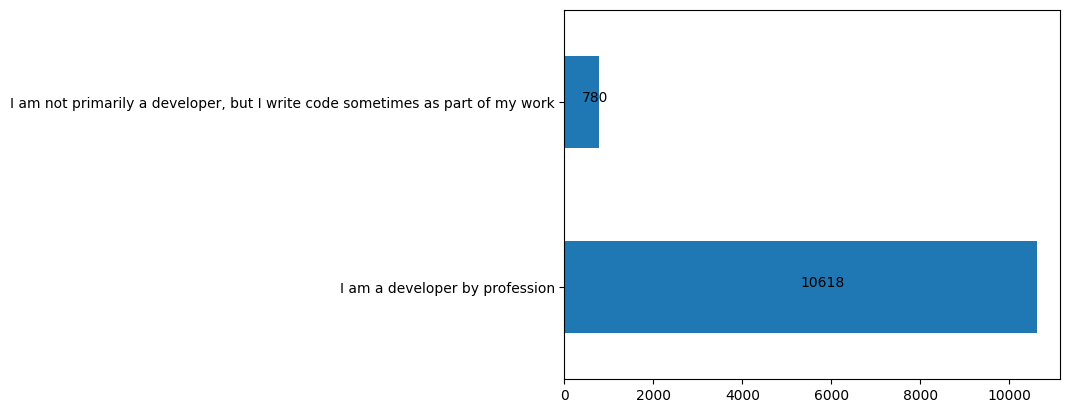

In [23]:

x = data['MainBranch'].value_counts()
ax = x.plot(kind='barh',)
for i, v in enumerate(x):
    ax.text(v/2, i, str(v), color='black')

Closing the database connection.


In [24]:
conn.close()

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
